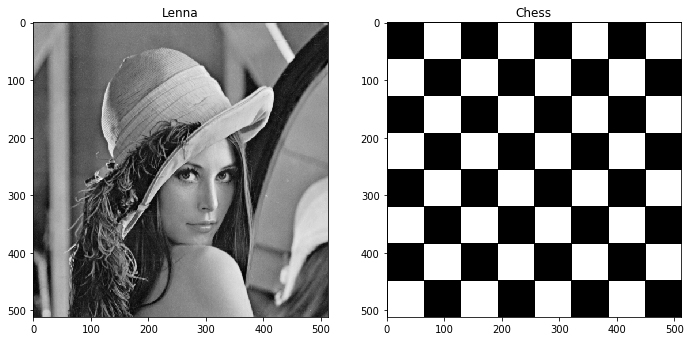

In [26]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
import cv2
import math
import time
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='crarojasca', api_key='0TgPUaFsSObByh4UJKQ1')

img=list()

img.append(cv2.imread("Figures/Lenna.png"))
img[0] = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
img.append(cv2.imread("Figures/Chess.png"))
img[1] = cv2.cvtColor(img[1], cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) ,plt.imshow(img[0], cmap='gray')
plt.title('Lenna')
plt.subplot(122) ,plt.imshow(img[1], cmap='gray')
plt.title('Chess')

plt.show()


1.0 6.560569561031098e-05


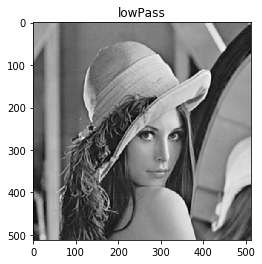

In [71]:
def butterworth_lowPass(img, fo, n):
    base = np.matrix([[math.sqrt((x-img.shape[0]/2)**2+(y-img.shape[1]/2)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    base = (base-base.min())/(base.max()-base.min())
    base = 1/(1 + np.power((base/fo),(2*n)))
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    
    
    magnitude_spectrum = 20*np.log(np.abs(f_flt))
    print(base.max(),base.min())
    return out

lowPass = butterworth_lowPass(img[0], 0.3, 4)
plt.figure(1)
plt.imshow(lowPass, cmap='gray')
plt.title('lowPass')

plt.show()

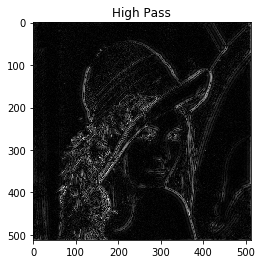

In [84]:
def butterworth_highPass(img, fo, n):
    base = np.matrix([[math.sqrt((x-img.shape[0]/2)**2+(y-img.shape[1]/2)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    base = (base-base.min())/(base.max()-base.min())
    base = np.power((base/fo),(2*n))/(1 + np.power((base/fo),(2*n)))
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    
    return out

high = butterworth_highPass(img[0], 0.1, 4)
plt.figure(1)
plt.imshow(high, cmap='gray')
plt.title('High Pass')

plt.show()

1.0 0.0038910505836575876


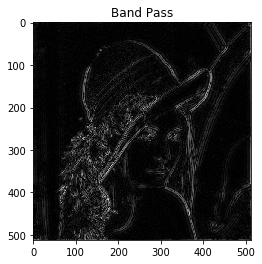

In [93]:
def butterworth_bandPass(img, fo, f1, n):
    lowPass  = butterworth_lowPass(img, f1, 4)
    out = butterworth_highPass(lowPass, fo, 4)
    return out

band = butterworth_bandPass(img[0], 0.1, 0.5, 4)
plt.figure(1)
plt.imshow(band, cmap='gray')
plt.title('Band Pass')

plt.show()